<a href="https://colab.research.google.com/github/achmadbadri/UjiCoba/blob/main/GitHub_HMSP_Tahun_2019_s_d_2020_dari_data_2014_LSTM_Drew_Scatterday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

In [14]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style
from google.colab import files
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,12,31)
df = web.DataReader("HMSP.JK", 'yahoo', start, end) 

# get 2019 data to test our model on 
start = datetime.datetime(2018,11,13)
end = datetime.datetime(2019,12,31)
test_df = web.DataReader("HMSP.JK", 'yahoo', start, end) 
print(df.shape)
print(test_df.shape)

(1251, 6)
(293, 6)


In [16]:
test_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-20,2100.0,2080.0,2080.0,2100.0,25354900.0,1970.319580
2019-12-23,2190.0,2090.0,2120.0,2150.0,65262500.0,2017.232056
2019-12-26,2180.0,2130.0,2170.0,2130.0,29201600.0,1998.467041
2019-12-27,2160.0,2110.0,2150.0,2130.0,29028200.0,1998.467041
2019-12-30,2150.0,2100.0,2140.0,2100.0,25544900.0,1970.319580


In [17]:
# Create train set of adj close prices data:
train_data = df.loc[:,'Adj Close'].to_numpy()
print(train_data.shape) # 1258 


# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

(1251,)


In [18]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))

print(X_train.shape)


# Visualizing our data with prints: 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(1215, 36, 1)
X_train:
[[1845.97399902]
 [1844.49633789]
 [1819.37072754]
 [1807.546875  ]
 [1795.72351074]
 [1789.81164551]
 [1803.11303711]
 [1817.89282227]
 [1891.7911377 ]
 [1891.7911377 ]
 [1891.7911377 ]
 [1890.31274414]
 [1902.13659668]
 [1906.57067871]
 [1920.61120605]
 [2002.63793945]
 [2001.16040039]
 [1952.38720703]
 [1949.43151855]
 [1981.9465332 ]
 [1965.68920898]
 [1977.51306152]
 [2011.5057373 ]
 [2061.75634766]
 [2098.70556641]
 [2098.70556641]
 [2098.70556641]
 [2045.49865723]
 [2061.75634766]
 [2046.97668457]
 [2046.97668457]
 [2039.58666992]
 [2036.63085938]
 [2036.63085938]
 [2030.71911621]
 [2030.71911621]]


y_train: [[2024.80737305]]



In [19]:
# Build the model 
model = keras.Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
85/85 [==============================] - 6s 45ms/step - loss: 0.0210 - val_loss: 0.0022
Epoch 2/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 3/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 6/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 7/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 8/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/20
85/85 [==============================] - 3s 37ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/20
85/85 [==============================] - 3s 36ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 11/

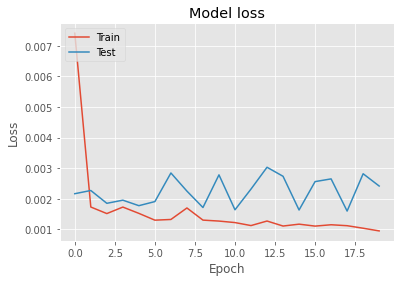

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = test_df['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)




In [22]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = test_df['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)


In [23]:
predicted_y = pd.DataFrame(predicted_y)
org_y = pd.DataFrame(org_y)
concat = pd.DataFrame()
concat['Real_Value'] = org_y[0]
concat['Predict_Value'] = predicted_y[0]
concat['Selisih'] = concat['Real_Value'] - concat['Predict_Value']
concat['Lost/Risk (%)'] = concat['Selisih']/concat['Predict_Value']*100
concat.head(10)

,Real_Value,Predict_Value,Selisih,Lost/Risk (%)
0,3411.569092,3366.714844,44.854248,1.332285
1,3520.159912,3355.061279,165.098633,4.920883
2,3592.553955,3368.391846,224.162109,6.654870
3,3538.258545,3400.676758,137.581787,4.045718
4,3474.913818,3425.996582,48.917236,1.427825
5,3447.765869,3434.540039,13.225830,0.385083
6,3483.963135,3430.822266,53.140869,1.548925
7,3483.963135,3428.462891,55.500244,1.618808
8,3429.667480,3426.527588,3.139893,0.091635
9,3483.963135,3416.451416,67.511719,1.976077


In [24]:
concat.describe()

,Real_Value,Predict_Value,Selisih,Lost/Risk (%)
count,257.000000,257.000000,257.000000,257.000000
mean,2803.837003,2808.481201,-4.643573,-0.247003
std,568.390362,547.928284,84.198588,3.187923
min,1782.670166,1789.774292,-470.188721,-17.954526
25%,2148.586670,2158.644531,-54.631836,-1.873840
50%,2983.626953,2998.912842,3.509521,0.176419
75%,3357.273438,3332.223389,48.917236,1.759343
max,3592.553955,3434.540039,224.162109,8.925610


In [25]:
# MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: %.2f" % mean_squared_error(concat['Real_Value'], concat['Predict_Value']))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(concat['Real_Value'], concat['Predict_Value'], squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(concat['Real_Value'], concat['Predict_Value']))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(concat['Real_Value'], concat['Predict_Value']))

MSE: 7083.38
RMSE: 84.16
MAE: 61.86
R2 score: 0.98


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

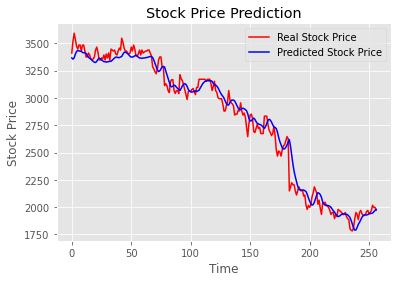

In [26]:
# plot the results 
plt.plot(concat['Real_Value'], color = 'red', label = 'Real Stock Price')
plt.plot(concat['Predict_Value'], color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()